# Subquestion 2
### How do neutral-toned articles fit into the path structure? Are they more likely to be used as transitional nodes between positive and negative articles?

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("df_paths1.pickle", "rb") as f:
    df = pickle.load(f)

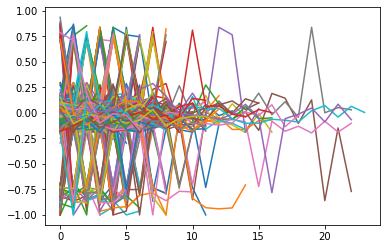

In [25]:
rand_ind = np.random.choice(df.index, size=1000)
for i in rand_ind:
    plt.plot(df.iloc[i]["Scores"])

##### With padding: squeezing all scores in a interval

In [3]:
def pad_path(paths,val=0):
    """
    paths: list of lists
    """
    max_path_length = len(max(paths, key=len))
    for i in range(len(paths)):
        paths[i] = paths[i] + [val]*(max_path_length - len(paths[i]))
    return np.array(paths)

In [5]:
all_paths = pad_path(list(df["Scores"]))

In [6]:
len(max(list(df["Scores"]), key=len))

405

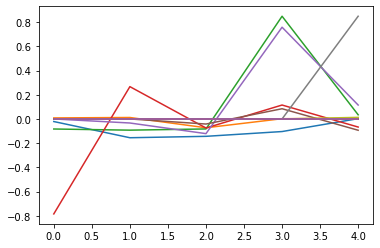

In [7]:
plt.plot(all_paths[np.random.choice(len(all_paths), size=5)])
plt.show()

##### Paths with high mean absolute sentiment

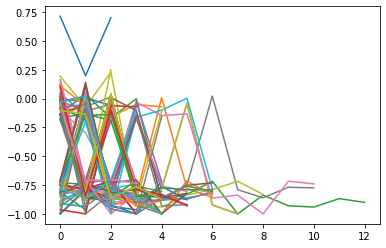

In [48]:
df["Scores_mean"] = df["Scores"].apply(lambda x: sum(x)/len(x))
df["Path_length"] = df["Scores"].apply(lambda x: len(x))
df_high_sentiment = df[(np.abs(df["Scores_mean"]) > 0.5) & (df["Path_length"] > 2)]
rand_ind = np.random.choice(df_high_sentiment.index, size=100)
for i in rand_ind:
    plt.plot(df.loc[i]["Scores"])

Note: many high-sentiment paths are of length 1 or 2. We don't care for these.

In [49]:
np.unique(df[np.abs(df["Scores_mean"]) > 0.5]["Path_length"], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 18]),
 array([677, 152, 213, 138, 178,  65,  40,  13,   5,   3,   1,   1,   1]))

Observation: many of the high-sentiment paths are negative. Although there seems to be more of the negative articles in the overall wikispeedia game (cf subquest1_1 notebook), here it seems that <b>ONLY</b> negative articles are in the game paths. Either there is a confounder which is the games chosen by the players (but I think we can reasonably assume that the assignment of the game targets and source is random), or the other reason is that players tend to click more on the negative-sentiment articles. This could be a proof of the "people are more attracted to information that shocks" idea. However, could it be simply that the game targets are all negative, hence the need to go through a negative path?

In [93]:
from scipy.interpolate import interp1d

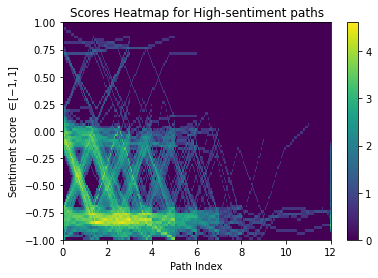

In [115]:
max_path_length = 12
path_resolution = 20  # resolution between 2 articles; e.g. with 20: there are 20 points between source and 1st article clicked
score_resolution = 80 # 20 -> [-1, -0.9, ..., 0.9, 1]
score_step = (1-(-1))/score_resolution

# max_length = df_high_sentiment["Scores"].apply(len).max()  # Get the maximum length of Scores

path_scores_heatmap = np.zeros((score_resolution, path_resolution*max_path_length))

for i in df_high_sentiment.index:
    path = df_high_sentiment.loc[i]["Scores"]
    x = np.arange(len(path))
    f = interp1d(x,path)
    path_space = np.linspace(0,len(path)-1, path_resolution*len(path))
    f_path_space = f(path_space)
    for path_ind,score in enumerate(f_path_space):
        y_ind = round(score/score_step) + score_resolution//2
        path_scores_heatmap[y_ind, min(path_ind,path_resolution*max_path_length-1)] += 1

# Plot the heatmap
ax = plt.imshow(np.log(np.flipud(path_scores_heatmap)+1), aspect='auto', cmap='viridis', interpolation='nearest', extent=[0,12,-1,1])
plt.colorbar()
plt.xlabel('Path Index')
plt.ylabel('Sentiment score $\in[-1,1]$')
plt.title('Scores Heatmap for High-sentiment paths')
plt.show()

It seems like there are many oscillations in high-sentiment paths. Is it just because we filtered the high-sentiment paths? Or are we just not seeing anything and maybe the oscillations appear while the straight paths don't?